3.8174223936107326e-08


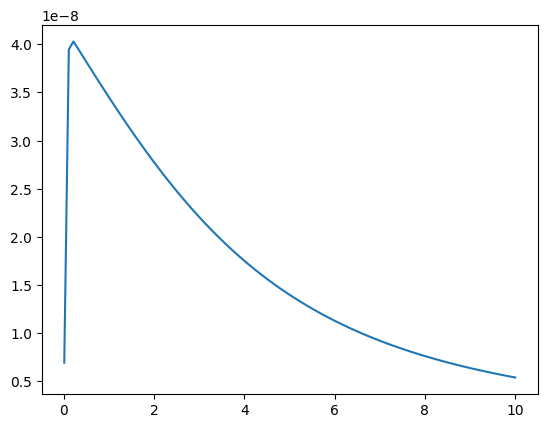

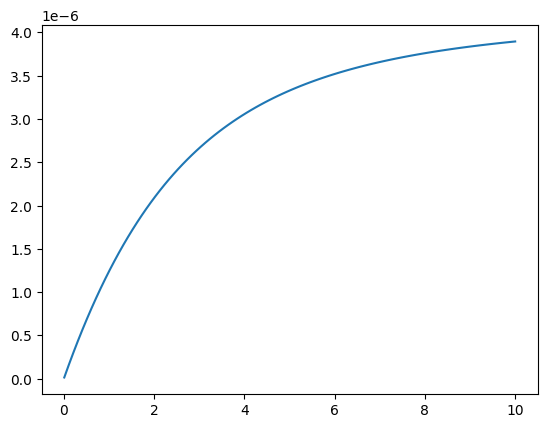

In [9]:
# Exercise 1

from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

from numpy import arange, linspace,pi
import matplotlib.pyplot as plot 
fig, ax = plot.subplots()

zmin = 0.01 
zmax = 10 
Nz = 100 

N = 100 
L = 10.0 #units in meters of the square 

G = 6.674e-11 #Grav const
sigma = 100.0 #density kg/m^2 

x, w = gaussxwab(N,-L/2,L/2) 

def f_disk(z): 
    s = 0.0
    for i in range(N): 
        for j in range(N): 
            s += w[i]*w[j]/(x[i]**2 + x[j]**2 + z**2)**(1/2)
    return G*sigma*z*2*pi*s

def f_square(z): 
    #Returns force per unit mass 
    s = 0.0 
    for i in range(N): 
        for j in range(N): 
            s += w[i]*w[j]/(x[i]**2 + x[j]**2 + z**2)**(3/2)
    return G*sigma*z*s 

print(f_square(0.5))

zpoints = linspace(zmin,zmax,Nz) 
fpoints = f_square(zpoints)

ax.plot(zpoints,fpoints) 
plot.show()


#b. 

fig,ax2 = plot.subplots()

fpoints2 = f_disk(zpoints)

ax2.plot(zpoints,fpoints2)
plot.show()

E(0,0,3) =  0 0 29699966683
E(0,0,3) =  0.0 0.0 146146624.661111


<function matplotlib.pyplot.show(close=None, block=None)>

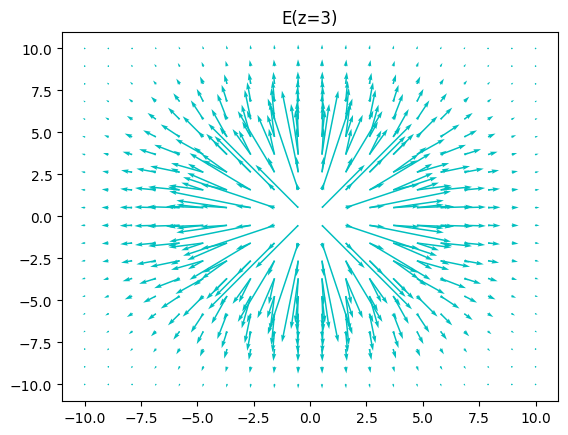

In [1]:
# Exercise 5.2

#a. 

from scipy.integrate import dblquad
import numpy as np
import matplotlib.pyplot as plt
from numpy import *

def Exi(x,y): 
    return (X-x)/((x-X)**2 + (y-Y)**2 + 9)**3
def Eyi(x,y): 
    return (Y-y)/((x-X)**2 + (y-Y)**2 + 9)**3
def Ezi(x,y): 
    return (3)/((x-X)**2 + (y-Y)**2 + 9)**3


def Ex(X,Y,Z): # Calculates Ex at the coordinates X,Y,Z
    k = 8.988 * 10**9 
    sigma = 1
    def Exi(x,y): 
        return (X-x)/((x-X)**2 + (y-Y)**2 + 9)**3
    E,trash = dblquad(Exi,-5,5,-5,5)
    return E*sigma*k
def Ey(X,Y,Z): 
    k = 8.988 * 10**9 
    sigma = 1
    def Eyi(x,y): 
        return (Y-y)/((x-X)**2 + (y-Y)**2 + 9)**3
    E,trash = dblquad(Eyi,-5,5,-5,5)
    return E

k = 8.988 * 10**9 
sigma = 1
# Ex,trash = dblquad(Exi,-5,5,-5,5)
# Ey,trash = dblquad(Eyi,-5,5,-5,5)
# Ez,trash = dblquad(Ezi,-5,5,-5,5)

# Ex = round(Ex * sigma * k)
# Ey = round(Ey * sigma * k)
# Ez = round(Ez * sigma * k)


# Vector Field Plot

points = np.linspace(-10,10,20)

x,y = np.meshgrid(points,points)


Exlist = [[Ex(X,Y,3) for X in points ] for Y in points]
Eylist = [[Ey(X,Y,3) for X in points ] for Y in points]
# Exercise 5.2

#a. 

from scipy.integrate import dblquad
import numpy as np
import matplotlib.pyplot as plt

def Exi(x,y): 
    return (X-x)/sqrt(((x-X)**2 + (y-Y)**2 + 9))**3
def Eyi(x,y): 
    return (Y-y)/sqrt(((x-X)**2 + (y-Y)**2 + 9))**3
def Ezi(x,y): 
    return (3)/(sqrt((x-X)**2 + (y-Y)**2 + 9))**3

X = 0
Y = 0
k = 8.988 * 10**9 
sigma = 1
Ex1,trash = dblquad(Exi,-5,5,-5,5)
Ey1,trash = dblquad(Eyi,-5,5,-5,5)
Ez1,trash = dblquad(Ezi,-5,5,-5,5)

Ex1 = round(Ex1 * sigma * k)
Ey1 = round(Ey1 * sigma * k)
Ez1 = round(Ez1 * sigma * k)

print("E(0,0,3) = ",Ex1,Ey1,Ez1)

def Ex(X,Y,Z): # Calculates Ex at the coordinates X,Y,Z
    k = 8.988 * 10**9 
    sigma = 1
    def Exi(x,y): 
        return (X-x)/((x-X)**2 + (y-Y)**2 + 9)**3
    E,trash = dblquad(Exi,-5,5,-5,5)
    return E*sigma*k
def Ey(X,Y,Z): 
    k = 8.988 * 10**9 
    sigma = 1
    def Eyi(x,y): 
        return (Y-y)/((x-X)**2 + (y-Y)**2 + 9)**3
    E,trash = dblquad(Eyi,-5,5,-5,5)
    return E*sigma * k



# Vector Field Plot

points = np.linspace(-10,10,20)

x,y = np.meshgrid(points,points)


Exlist = [[Ex(X,Y,3) for X in points ] for Y in points]
Eylist = [[Ey(X,Y,3) for X in points ] for Y in points]
plt.quiver(x,y,Exlist,Eylist,color='c')
plt.title('E(z=3)')

#b. 

from numpy import exp,sin,cos

def Ex(X,Y,Z): # Calculates Ex at the coordinates X,Y,Z
    k = 8.988 * 10**9 
    sigma = 1
    def Exi(x,y): 
        alpha = 1
        return exp(-(x**2 + y**2)/(2 * alpha**2))*((X-x)/((x-X)**2 + (y-Y)**2 + 9)**3)
    E,trash = dblquad(Exi,-5,5,-5,5)
    return E*sigma*k
def Ey(X,Y,Z): 
    k = 8.988 * 10**9 
    sigma = 1
    alpha = 1
    def Eyi(x,y): 
        return exp(-(x**2 + y**2)/(2 * alpha**2))*(Y-y)/((x-X)**2 + (y-Y)**2 + 9)**3
    E,trash = dblquad(Eyi,-5,5,-5,5)
    return E*sigma * k

def Ez(X,Y,Z):
    k = 8.988 * 10**9 
    sigma = 1
    def Ezi(x,y):  
        alpha = 1
        return exp(-(x**2 + y**2)/(2 * alpha**2))*((3)/((x-X)**2 + (y-Y)**2 + 9)**3)
    E,trash = dblquad(Ezi,-5,5,-5,5)
    return E * sigma * k
print("E(0,0,3) = ",Ex(0,0,3),Ey(0,0,3),Ez(0,0,3))


points = np.linspace(-10,10,20)

x,y = np.meshgrid(points,points)


Exlist = [[Ex(X,Y,3) for X in points ] for Y in points]
Eylist = [[Ey(X,Y,3) for X in points ] for Y in points]
field = plt.quiver(x,y,Exlist,Eylist,color='c')
plt.title('E(z=3)')
plt.show

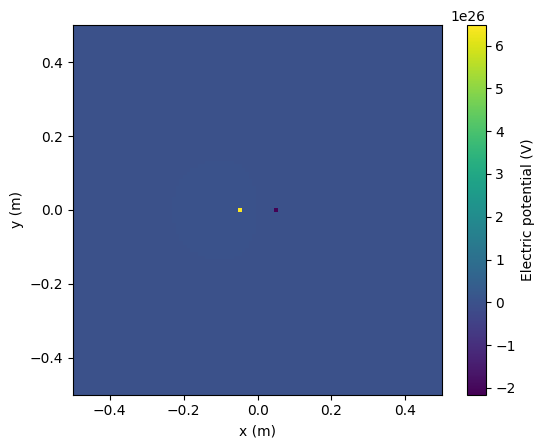

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the charges and their positions
q1 = 1 # C
q2 = -1 # C
x1 = -0.05 # m
x2 = 0.05 # m
y = 0 # m

# Define the grid of points on the square plane
x = np.linspace(-0.5, 0.5, 101) # m
X, Y = np.meshgrid(x, x)
Z = np.zeros_like(X)

# Calculate the potential at each point on the grid
for i in range(len(x)):
    for j in range(len(x)):
        r1 = np.sqrt((X[i,j]-x1)**2 + (Y[i,j]-y)**2)
        r2 = np.sqrt((X[i,j]-x2)**2 + (Y[i,j]-y)**2)
        V1 = k*q1 / r1
        V2 = k*q2 / r2
        Z[i,j] = V1 + V2

# Create a density plot of the potential
plt.figure()
plt.imshow(Z, origin='lower', extent=(-0.5, 0.5, -0.5, 0.5))
plt.colorbar(label='Electric potential (V)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

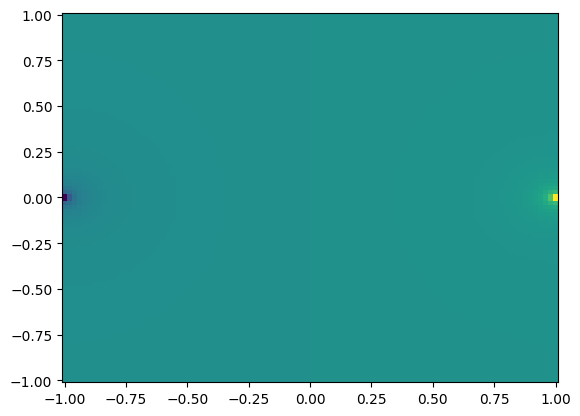

In [4]:
# Exercise 5.3
from scipy.integrate import dblquad

from numpy import *
import numpy as np
import matplotlib.pyplot as plt

k = 8.988 * 10**9 

def Vdip(x,y): 
    q = 1
    d = 2
    z = 0
    return q/sqrt((x-d/2)**2 + y**2 + (z)**2) - q/sqrt((x+d/2)**2 + y**2 + (z)**2)

x = linspace(-1,1,100)
y = linspace(-1,1,100)
X,Y = meshgrid(x,y)
V = array([[Vdip(xp,yp) for xp in x] for yp in y])

fig,ax = plt.subplots()
im = ax.pcolormesh(X, Y, V)

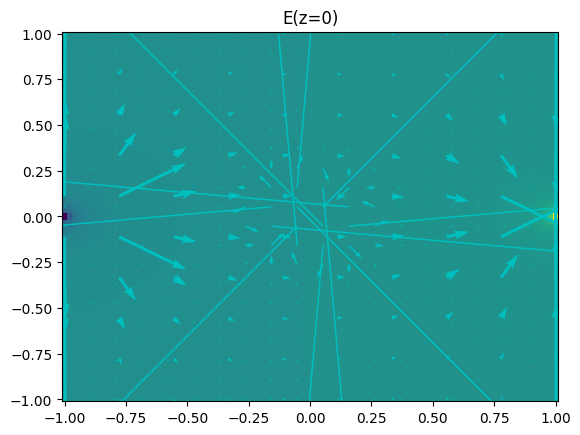

In [2]:
# Exercise 5.3
from scipy.integrate import dblquad

from numpy import *
import numpy as np
import matplotlib.pyplot as plt

k = 8.988 * 10**9 

def Vdip(x,y): 
    q = 1
    d = 2
    z = 0
    return q/sqrt((x-d/2)**2 + y**2 + (z)**2) - q/sqrt((x+d/2)**2 + y**2 + (z)**2)

x = linspace(-1,1,100)
y = linspace(-1,1,100)
X,Y = meshgrid(x,y)
V = array([[Vdip(xp,yp) for xp in x] for yp in y])

fig,ax = plt.subplots()
im = ax.pcolormesh(X, Y, V)

# b. 

def Ex(x,y): 
    d = 2
    z = 0
    q = 1
    return (q * (x + d/2))/sqrt((x + d/2)**2 + z**2 + y**2)**3 - (q * (x - d/2))/sqrt((x - d/2)**2 + z**2 + y**2)**3

def Ey(x,y): 
    d = 2
    z = 0
    q = 1

    return (q * y)/sqrt(((x + d/2)**2 + z**2 + y**2))**(3) - (q * y)/sqrt((x - d/2)**2 + z**2 + y**2)**3

points = linspace(-1,1,10)
x,y = meshgrid(points,points)

Exlist = [[Ex(X,Y) for X in points ] for Y in points]
Eylist = [[Ey(X,Y) for X in points ] for Y in points]
field1 = plt.quiver(x,y,Exlist,Eylist,color='c')
plt.title('E(z=0)')
plt.show

#c. 

# Calculations

k = 8.988 * 10**9 
L = .1

def V(x,y): 
    def Vbase(xprime,yprime): 
        q0 = 1
        L = .1
        if (x == xprime) and (y == yprime): 
            return 0
        return q0 * sin(2 * pi * xprime/L) * sin(2 * pi * yprime/L) * 1/(sqrt((x - xprime)**2 + (y - yprime)**2))
    integral, err = dblquad(Vbase,-L/2,L/2,-L/2,L/2)
    return k * integral

def Vdx(x,y): 
    h = .1
    return (V(x + h, y) - V(x - h, y))/(2 * h)


def Vdy(x,y): 
    h = .1
    return (V(x, y + h) - V(x, y - h))/(2 * h)
points = linspace(-1,1,20)
x,y = meshgrid(points,points)


Exlist = [[Vdx(i,j) for i in points] for j in points]
Eylist = [[Vdy(i,j) for i in points] for j in points]


# # Plotting

field2 = plt.quiver(x,y,Exlist,Eylist,color='c')


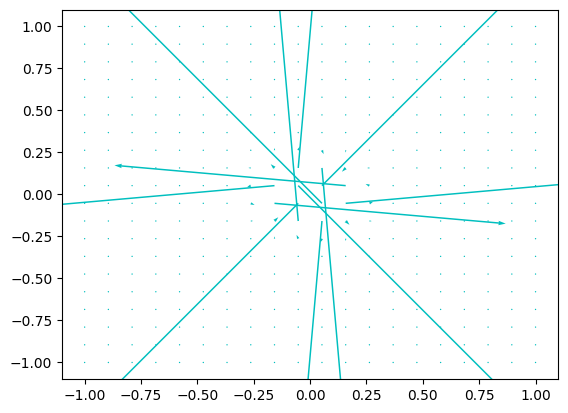

In [19]:
from scipy.integrate import dblquad

from numpy import *
import numpy as np
import matplotlib.pyplot as plt

k = 8.988 * 10**9 
L = .1

def V(x,y): 
    def Vbase(xprime,yprime): 
        q0 = 10
        L = .1
        if (x == xprime) and (y == yprime): 
            return 0
        return q0 * sin(2 * pi * xprime/L) * sin(2 * pi * yprime/L) * 1/(sqrt((x - xprime)**2 + (y - yprime)**2))
    integral, err = dblquad(Vbase,-L/2,L/2,-L/2,L/2)
    return k * integral

def Vdx(x,y): 
    h = .1
    return (V(x + h, y) - V(x - h, y))/(2 * h)


def Vdy(x,y): 
    h = .1
    return (V(x, y + h) - V(x, y - h))/(2 * h)
points = linspace(-1,1,20)
x,y = meshgrid(points,points)


Exlist = array([[Vdx(i,j) for i in points] for j in points])
Eylist = array([[Vdy(i,j) for i in points] for j in points])

# Little bit to normalize the vectors



Eangles = tan(Eylist/Exlist)

Exlist = [[2 * cos(Eangles[i][j]) for i in range(len(points))] for j in range(len(points))]
Eylist = [[2 * sin(Eangles[i][j]) for i in range(len(points))] for j in range(len(points))]

# # Plotting

field2 = plt.quiver(x,y,Exlist*S,Eylist*S,color='c')


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 0.1 # m
q0 = 100 # C/m^2
k = 9e9 # N m^2/C^2

# Create grid of points in xy plane
x = np.linspace(-0.5, 0.5, 101) * L
y = np.linspace(-0.5, 0.5, 101) * L
X, Y = np.meshgrid(x, y)

# Calculate electric field at each point
E = np.zeros((101, 101, 2))
for i in range(101):
    for j in range(101):
        x0 = X[i,j]
        y0 = Y[i,j]
        V = 0
        for xi in np.linspace(-0.5, 0.5, 101) * L:
            for yj in np.linspace(-0.5, 0.5, 101) * L:
                r = np.sqrt((x0-xi)**2 + (y0-yj)**2)
                if r > 0:
                    V += k * q0 * np.sin(2*np.pi*xi/L) * np.sin(2*np.pi*yj/L) / r
        Ex = -(V - np.roll(V, 1, axis=1)) / np.diff(x)[0]
        Ey = -(V - np.roll(V, 1, axis=0)) / np.diff(y)[0]
        E[i,j,0] = Ex[i]
        E[i,j,1] = Ey[j]

plt.quiver(X, Y, E[:,:,0], E[:,:,1])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Electric Field')
plt.show()

AxisError: axis 1 is out of bounds for array of dimension 0

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 0.1 # m
q0 = 100 # C/m^2
k = 9e9 # N m^2/C^2

# Create grid of points in xy plane
x = np.linspace(-0.5, 0.5, 101) * L
y = np.linspace(-0.5, 0.5, 101) * L
X, Y = np.meshgrid(x, y)

# Calculate electric field at each point
V = np.zeros((101, 101))
for i in range(101):
    for j in range(101):
        x0 = X[i,j]
        y0 = Y[i,j]
        for xi in np.linspace(-0.5, 0.5, 101) * L:
            for yj in np.linspace(-0.5, 0.5, 101) * L:
                r = np.sqrt((x0-xi)**2 + (y0-yj)**2)
                if r > 0:
                    V[i,j] += k * q0 * np.sin(2*np.pi*xi/L) * np.sin(2*np.pi*yj/L) / r
        Ex = -(V - np.roll(V, 1, axis=1)) / np.diff(x)[0]
        Ey = -(V - np.roll(V, 1, axis=0)) / np.diff(y)[0]
        E[i,j,0] = Ex[i]
        E[i,j,1] = Ey[j]

plt.quiver(X, Y, E[:,:,0], E[:,:,1])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Electric Field')
plt.show()

ValueError: setting an array element with a sequence.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 0.1 # m
q0 = 100 # C/m^2
k = 9e9 # N m^2/C^2

# Create grid of points in xy plane
x = np.linspace(-0.5, 0.5, 101) * L
y = np.linspace(-0.5, 0.5, 101) * L
X, Y = np.meshgrid(x, y)

# Calculate electric field at each point
E = np.zeros((101, 101, 2))
for i in range(101):
    for j in range(101):
        x0 = X[i,j]
        y0 = Y[i,j]
        V = 0
        for xi in np.linspace(-0.5, 0.5, 101) * L:
            for yj in np.linspace(-0.5, 0.5, 101) * L:
                r = np.sqrt((x0-xi)**2 + (y0-yj)**2)
                if r > 0:
                    V += k * q0 * np.sin(2*np.pi*xi/L) * np.sin(2*np.pi*yj/L) / r
        Ex = -(V - np.roll(V, 1, axis=1))[i, j] / np.diff(x)[0]
        Ey = -(V - np.roll(V, 1, axis=0))[i, j] / np.diff(y)[0]
        E[i,j,0] = Ex
        E[i,j,1] = Ey

plt.quiver(X, Y, E[:,:,0], E[:,:,1])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Electric Field')
plt.show()

AxisError: axis 1 is out of bounds for array of dimension 0

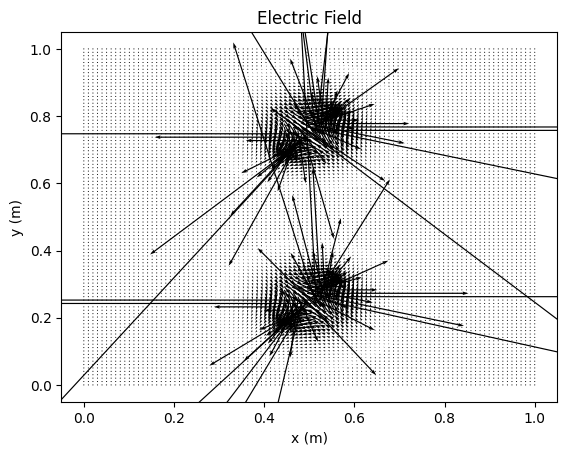

In [9]:
import numpy as np

# Define the grid
N = 100
L = 1
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)

# Define the charges
q0 = 1
q1 = -1
r0 = L/4
r1 = 3*L/4

# Initialize the potential
V = np.zeros_like(X)

# Calculate the potential due to the charges
k = 1/(4*np.pi*8.854e-12)
for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        r0i = np.sqrt((xi - r0)**2 + (yj - L/2)**2)
        r1i = np.sqrt((xi - r1)**2 + (yj - L/2)**2)
        V[i,j] = k * (q0/r0i - q1/r1i)

# Calculate the electric field
E = np.zeros((N, N, 2))
for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        if i > 0 and i < N-1 and j > 0 and j < N-1:
            Ex = -(V[i,j] - V[i-1,j]) / np.diff(x)[0]
            Ey = -(V[i,j] - V[i,j-1]) / np.diff(y)[0]
            E[i,j,0] = Ex
            E[i,j,1] = Ey
            
plt.quiver(X, Y, E[:,:,0], E[:,:,1])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Electric Field')
plt.show()